In [1]:
# INTRODUÇÃO
#Dados do Titanic - contém dados demográficos e informações de 891 dos 2.224 
#passageiros e tripulantes a bordo do Titanic. 

# CONJUNTO DE DADOS
#Survived (Sobreviveu): 0 = Não, 1 = Sim 
#Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
#Sex (Sexo): Sexo do passageiro
#Age (Idade): Idade em anos
#Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
#Parch: Quantidade de pais / crianças a bordo do Titanic
#Ticket (Bilhete): Número do bilhete de embarque
#Fare (Tarifa): Tarifa paga pelo Passageiro
#Cabin (Cabine): Número de cabine
#Embarked (Embarque): Porto de Embarque (
#C = Cherbourg, Q=Queenstown, S = Southampton)

# DEFINIÇÃO DAS PERGUNTAS / DESCRIÇÃO DAS INVESTIGAÇÃO:
#Qual foi a porcentagem de sobreviventes?
#Qual era a faixa etaria dos que sobreviveram?
#Dessas faixa etaria, mais crianças ou adultos sobreviveram?
#Diferença de passageiros entre os sexos?

# DESCRIÇÃO DA LIMPEZA:
#Como todas as perguntas estão relacionada a idade pode retirar toda as
#colunas de dados que não serão utilizados.


In [2]:
#instalação das três bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#leitura do arquivo csv, separado por ponto e vígula
titanic = pd.read_csv("titanic-data-6.csv", sep=';')

In [4]:
#para exibição dos registros
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [5]:
# limpeza dos dados
def limpeza(colunas):
    for i in range(0, len(colunas)):
        titanic.drop([colunas[i]],axis = 1, inplace = True)
    return titanic.head()

colunas = ['Pclass','Fare','Ticket','Cabin','SibSp']

limpeza(colunas)

,PassengerId,Survived,Name,Sex,Age,Parch,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,22.0,0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,C
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,S
4,5,0,"Allen, Mr. William Henry",male,35.0,0,S


In [6]:
titanic_idade = titanic.copy()
titanic_idade.drop(titanic[titanic['Age'].isnull() == True].index ,inplace=True)

Sobreviventes:  342
Não Sobreviventes:  549


Text(0, 0.5, '')

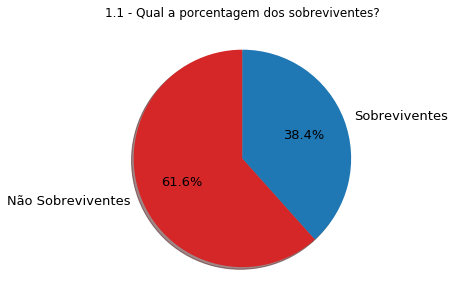

In [7]:
# Qual foi a porcentagem de sobreviventes?
titanic['Not Survived'] = titanic['Survived'].map({0:1,1:0})

# Contabiliza os não sobreviventes e sobreviventes
print('Sobreviventes: ', titanic['Survived'].value_counts()[1])
print('Não Sobreviventes: ', titanic['Survived'].value_counts()[0])

#Gera o grafico
titanic['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'),
title='1.1 - Qual a porcentagem dos sobreviventes?',fontsize=13, shadow=True,startangle=90,autopct='%1.1f%%',
labels=('Não Sobreviventes','Sobreviventes'),
figsize=(5,5)).set_ylabel('')

In [8]:
#O maior numero de não sobreviventes é de 61,6% contra 38,4% de sobreviventes

Text(0, 0.5, 'Frequência')

<Figure size 432x288 with 0 Axes>

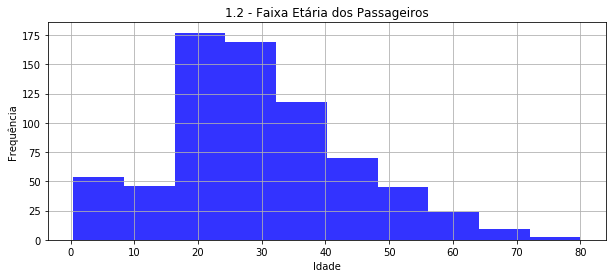

In [9]:
# Qual era a faixa etaria dos que sobreviveram?
plt.figure();
titanic_idade.hist(column='Age', color=('blue'), alpha=0.8, bins=10, figsize=(10,4))
plt.title('1.2 - Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')

In [10]:
#A maior faixa etaria com maior numero de passageiros, girava entre 20 a 40 anos.

In [11]:
#Divide em grupos de crianças e adultos
titanic_idade['Crianca_Adulto'] = 0

titanic_idade.loc[titanic_idade[titanic_idade['Age'] < 18].index, 'Crianca_Adulto'] = 'Crianças'

titanic_idade.loc[titanic_idade[titanic_idade['Age'] >= 18].index, 'Crianca_Adulto'] = 'Adulto'

(Text(0, 0.5, ''), Text(0.5, 0, ''))

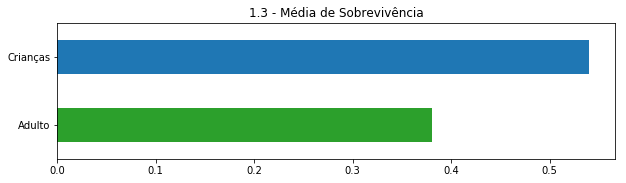

In [12]:
#Grafico de sobrevivencia de criancas e adultos
titanic_idade.groupby('Crianca_Adulto')['Survived'].mean().plot.barh(title='1.3 - Média de Sobrevivência',
figsize=(10,2.5),color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')

In [13]:
#As crianças foram prioridades no momento da evacuação

#Diferença na taxa de passageiors entre homens e mulheres.
titanic.groupby('Sex').count()['PassengerId'].plot.pie(colors=('tab:red', 'tab:blue'),
title='1.4 - Porcentagem dos passageiros por sexo',fontsize=13, shadow=True,startangle=90,autopct='%1.1f%%',
labels=('Mulheres','Homens'),
figsize=(5,5)).set_ylabel('')

# CONCLUSÃO
Teve como objetivo analisar as chance de sobrevivência de algumas pessoas para com as outras.
Sabe que o navio possuia um numero limitado de botes para a quantidade de pessoas abordo.
Conforme o gráfico 1.1 consegue notar que se houvesse um núremo permitido pelo a norma da época esse número seria diferente.
A faixa etária girava entorno de 20 e 40 anos de idade visto no gráfico 1.2
Sobre às crianças, podemos identificar uma média de sobrevivência acima de (0,57 contra 0,38)  gráficos 1.3.
As crianças foram a prioridades na evacuação do navio.
Os homens foram a maior parte dos passageiros a bordo comparado as mulheres, gráfico 1.4

O estudo em questão pode ser utilizado de outras analises, explorar outras informações, saber encontrar outros
tripulantes por exemplo. A propria idade poderia ser uma forma de exploração.
Estamos falando de dados que não são definitivos.